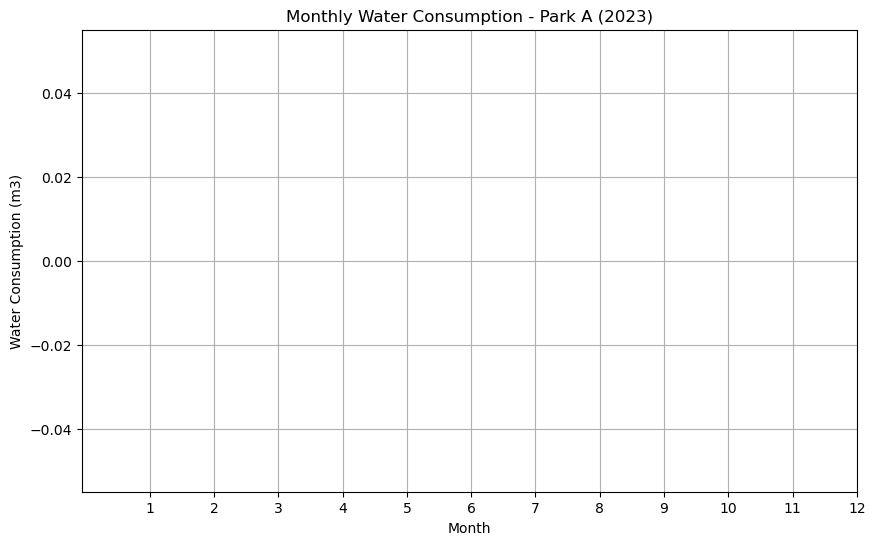

Average Monthly Cost for Park A: nan
Park with Highest Water Consumption: Park;Year;Month;Day;Consumption
Park with Lowest Water Consumption: Park;Year;Month;Day;Consumption

Statistics for Park Park;Year;Month;Day;Consumption:
Mean: nan
Median: nan
Standard Deviation: nan
Skewness: nan


ValueError: Bin edges must be unique: array([nan, nan, nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# Carregar o arquivo CSV
data = pd.read_csv("water_consumption.csv", names=["Park", "Year", "Month", "Day", "Consumption"])

def plot_monthly_water_consumption(year, start_month, end_month, park_id):
    # Filtrar os dados com base nos parâmetros fornecidos pelo usuário
    filtered_data = data[(data["Year"] == year) &
                         (data["Month"] >= start_month) &
                         (data["Month"] <= end_month) &
                         (data["Park"] == park_id)]

    # Agrupar o consumo mensal de água
    monthly_consumption = filtered_data.groupby("Month")["Consumption"].sum()

    # Criar o barplot
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_consumption.index, monthly_consumption.values, color='skyblue')
    plt.title(f"Monthly Water Consumption - Park {park_id} ({year})")
    plt.xlabel("Month")
    plt.ylabel("Water Consumption (m3)")
    plt.xticks(np.arange(start_month, end_month + 1, 1))
    plt.grid(True)
    plt.show()

def average_monthly_water_cost(num_parks, park_id):
    # Filtrar os dados com base nos parâmetros fornecidos pelo usuário
    filtered_data = data[data["Park"] == park_id].groupby(["Year", "Month"])["Consumption"].sum().reset_index()

    # Calcular o custo mensal médio relacionado ao consumo de água para o parque especificado
    filtered_data["Monthly Cost"] = filtered_data["Consumption"] * 0.7  # Custo de água é 0.7 AC/m3
    filtered_data["Monthly Cost"] = np.where(filtered_data["Consumption"] > 1000,
                                             filtered_data["Monthly Cost"] + (filtered_data["Consumption"] - 1000) * 0.7 * 0.15,
                                             filtered_data["Monthly Cost"])

    # Calcular a média dos custos mensais
    average_cost = filtered_data["Monthly Cost"].mean()

    return average_cost

def statistical_analysis():
    # Calcular os custos mensais para todos os parques
    park_costs = {}
    for park_id in data["Park"].unique():
        average_cost = average_monthly_water_cost(len(data["Park"].unique()), park_id)
        park_costs[park_id] = average_cost

    # Encontrar o parque com o maior e menor consumo de água
    max_cost_park = max(park_costs, key=park_costs.get)
    min_cost_park = min(park_costs, key=park_costs.get)

    # Imprimir resultados
    print(f"Park with Highest Water Consumption: {max_cost_park}")
    print(f"Park with Lowest Water Consumption: {min_cost_park}")

    # Realizar a análise estatística para os dois parques
    for park_id in [max_cost_park, min_cost_park]:
        filtered_data = data[data["Park"] == park_id]["Consumption"]

        mean = filtered_data.mean()
        median = filtered_data.median()
        std_deviation = filtered_data.std()
        skewness = skew(filtered_data)

        print(f"\nStatistics for Park {park_id}:")
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        print(f"Standard Deviation: {std_deviation:.2f}")
        print(f"Skewness: {skewness:.2f}")

        # Construir tabelas de frequência relativa e absoluta
        # Uma tabela de distribuição de frequências é uma maneira organizada de apresentar um conjunto de dados. 
        # Ela lista as diferentes categorias (ou "intervalos de classe") em que as observações caem, junto com a frequência 
        # (ou contagem) de observações para cada categoria. Essas tabelas são úteis para ter uma visão geral da distribuição 
        # de dados e são frequentemente um primeiro passo em qualquer análise estatística mais detalhada.
        
        bins = pd.cut(filtered_data, bins=5, retbins=True)[1]
        frequency_table = pd.cut(filtered_data, bins=bins, include_lowest=True).value_counts().sort_index()
        relative_frequency_table = (frequency_table / frequency_table.sum()) * 100

        print("\nFrequency Table:")
        print(frequency_table)
        print("\nRelative Frequency Table:")
        print(relative_frequency_table)

        # Verificar outliers
        Q1 = filtered_data.quantile(0.25)
        Q3 = filtered_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = filtered_data[(filtered_data < lower_bound) | (filtered_data > upper_bound)]
        print("\nOutliers:")
        print(outliers)

        # Histogramas
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.hist(filtered_data, bins=10, color='skyblue', edgecolor='black')
        plt.title(f"Histogram - Park {park_id} (10 bins)")
        plt.xlabel("Water Consumption (m3)")
        plt.ylabel("Frequency")
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.hist(filtered_data, bins=100, color='skyblue', edgecolor='black')
        plt.title(f"Histogram - Park {park_id} (100 bins)")
        plt.xlabel("Water Consumption (m3)")
        plt.ylabel("Frequency")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Teste das funções
plot_monthly_water_consumption(2023, 1, 12, "A")
print(f"Average Monthly Cost for Park A: {average_monthly_water_cost(len(data['Park'].unique()), 'A'):.2f}")
statistical_analysis()

